In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
from scipy.stats import gmean

In [104]:
# constants
ticker = 'MSFT, AAPL, NKE, TSLA, NVDA, GME, BB'
start = '2014-01-01'
end = '2023-12-31'
mu_f = 0.042

In [105]:
# Get the data
market = yf.download('^GSPC', start=start, end=end).dropna()
stocks = yf.download(ticker, start=start, end=end).dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


In [106]:
# expected return based on historical average
def calculate_expected_return(data: pd.DataFrame) -> float:
    daily_returns = gmean(data['Adj Close'].pct_change().dropna() + 1) - 1
    return (daily_returns + 1) ** 252 - 1

In [107]:
mu_m = calculate_expected_return(market)
mu_i = calculate_expected_return(stocks)

# generate SML
beta = np.linspace(0, 2, 1000)
sml = mu_f + beta * (mu_m - mu_f)

# beta of stocks
daily_returns_market = market['Adj Close'].pct_change().dropna()
annual_var_market = np.var(daily_returns_market)*252

data = {}
for index, ticker in enumerate(stocks['Adj Close'].columns):
    data.setdefault(ticker, {})
        
    annual_cov = np.cov(
        stocks['Adj Close'][ticker].pct_change().dropna(), 
        daily_returns_market
    )[0][1]*252
    
    data[ticker]['beta_i'] = annual_cov / annual_var_market
    data[ticker]['mu_i'] = mu_i[index]

Text(0.5, 1.0, 'Security Market Line')

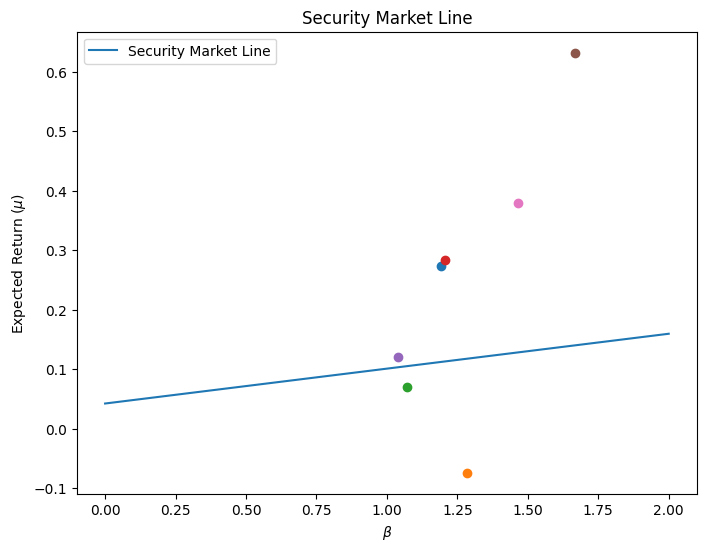

In [111]:
# plotting beta vs expected returns
plt.figure(figsize=(8, 6))
plt.plot(beta, sml, label='Security Market Line')

for ticker, value in data.items():
    plt.scatter(value['beta_i'], value['mu_i'])

plt.legend()
plt.ylabel(rf'Expected Return ($\mu$)')
plt.xlabel(rf'$\beta$')
plt.title('Security Market Line')

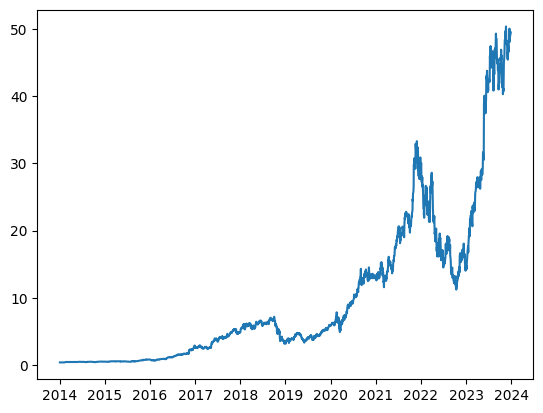

In [109]:
plt.plot(stocks['Adj Close']['NVDA'])